<a href="https://colab.research.google.com/github/KenichiQaz/ML_Learning/blob/main/Own_Try9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Tabular Modeling
! [ -e /content ] && pip install -Uqq fastbook kaggle waterfallcharts treeinterpreter dtreeviz
import fastbook
fastbook.setup_book()

from fastbook import *
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

     |████████████████████████████████| 719 kB 25.2 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 1.3 MB 77.3 MB/s 
     |████████████████████████████████| 4.7 MB 86.5 MB/s 
     |████████████████████████████████| 365 kB 72.5 MB/s 
     |████████████████████████████████| 115 kB 92.7 MB/s 
     |████████████████████████████████| 212 kB 97.9 MB/s 
     |████████████████████████████████| 120 kB 97.0 MB/s 
     |████████████████████████████████| 127 kB 97.9 MB/s 
     |████████████████████████████████| 6.6 MB 59.5 MB/s 
Mounted at /content/gdrive


In [3]:
# kaggle login run once

cred_path = Path('~/.kaggle/kaggle.json').expanduser()
if not cred_path.exists():
    cred_path.parent.mkdir(exist_ok=True)
    cred_path.write_text(creds)
    cred_path.chmod(0o600)

In [4]:
# Pick a path to download the dataset to
comp = 'bluebook-for-bulldozers'
path = URLs.path(comp)
path
Path.BASE_PATH = path

In [5]:
# Download dataset
from kaggle import api

if not path.exists():
    path.mkdir(parents=true)
    api.competition_download_cli(comp, path=path)
    shutil.unpack_archive(str(path/f'{comp}.zip'), str(path))

path.ls(file_type='text')

100%|██████████| 48.4M/48.4M [00:00<00:00, 80.2MB/s]


(#7) [Path('TrainAndValid.csv'),Path('median_benchmark.csv'),Path('Test.csv'),Path('Machine_Appendix.csv'),Path('ValidSolution.csv'),Path('Valid.csv'),Path('random_forest_benchmark_test.csv')]

In [6]:
#Show sample of data
df = pd.read_csv(path/'TrainAndValid.csv', low_memory=False)
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [7]:
#Data Manipulation
df['ProductSize'].unique()
sizes = 'Large','Large / Medium','Medium','Small','Mini','Compact'
df['ProductSize'] = df['ProductSize'].astype('category')
df['ProductSize'].cat.set_categories(sizes, ordered=True, inplace=True)
dep_var = 'SalePrice'
df[dep_var] = np.log(df[dep_var])

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [8]:
# Potentially usefull categorical data
df = add_datepart(df, 'saledate')
df_test = pd.read_csv(path/'Test.csv', low_memory=False)
df_test = add_datepart(df_test, 'saledate')
' '.join(o for o in df.columns if o.startswith('sale'))

'saleYear saleMonth saleWeek saleDay saleDayofweek saleDayofyear saleIs_month_end saleIs_month_start saleIs_quarter_end saleIs_quarter_start saleIs_year_end saleIs_year_start saleElapsed'

In [9]:
# Handle missing data or strings
procs = [Categorify, FillMissing]

In [10]:
# Split Training data
cond = (df.saleYear<2011) | (df.saleMonth<10)
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

cont,cat = cont_cat_split(df, 1, dep_var=dep_var)
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)

In [11]:
#show length of training and validation data
len(to.train),len(to.valid)

(404710, 7988)

In [12]:
# Mapping to classes
to.classes['ProductSize']

['#na#', 'Large', 'Large / Medium', 'Medium', 'Small', 'Mini', 'Compact']

In [64]:
# saving a project
save_pickle(path/'to.pkl',to)

In [65]:
# Loading a project
to = load_pickle(path/'to.pkl')

In [15]:
# Defining Variables
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [16]:
# Decision tree
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs, y);

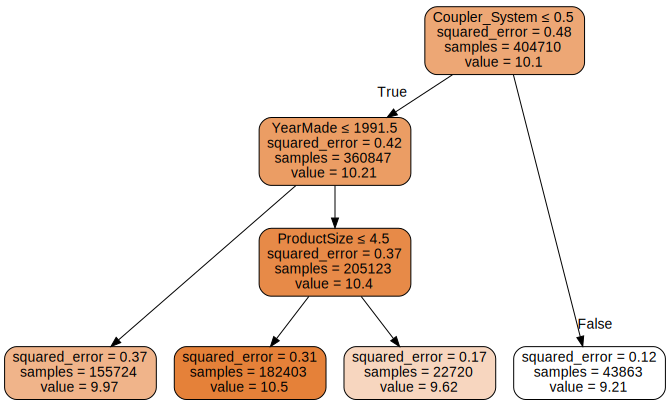

In [17]:
#Show the tree
draw_tree(m, xs, size=10, leaves_parallel=True, precision=2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


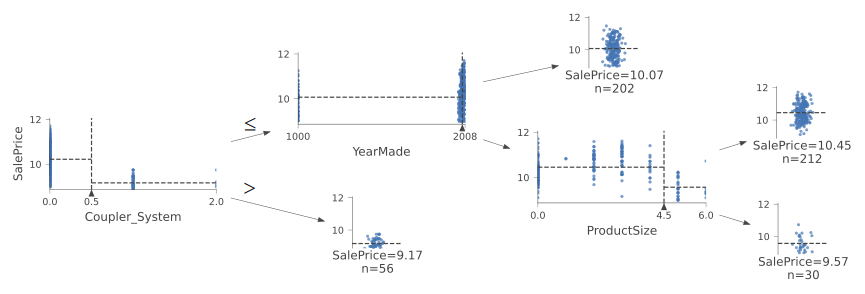

In [18]:
# show the same information using Terence Parr's dtreeviz library
samp_idx = np.random.permutation(len(y))[:500]
dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
        orientation='LR')

In [21]:
# change starting visualization date to make the charts more useful
xs.loc[xs['YearMade']<1900, 'YearMade'] = 1960
valid_xs.loc[valid_xs['YearMade']<1900, 'YearMade'] = 1960

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


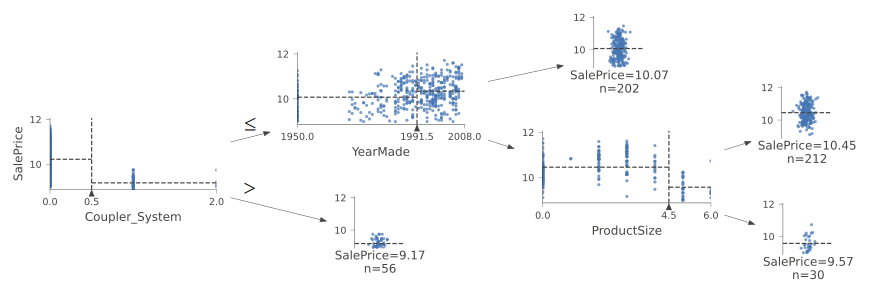

In [22]:
# Redraw charts
m = DecisionTreeRegressor(max_leaf_nodes=4).fit(xs, y)

dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
        orientation='LR')

In [23]:
# Build a bigger tree
m = DecisionTreeRegressor()
m.fit(xs, y);


In [24]:
# Check squared error of model (m_rmse)
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)
m_rmse(m, xs, y)
m_rmse(m, valid_xs, valid_y)

0.333145

In [25]:
#fixing the overfitting
m = DecisionTreeRegressor(min_samples_leaf=25)
m.fit(to.train.xs, to.train.y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.248563, 0.323362)

In [26]:
# Creating a random forest
def rf(xs, y, n_estimators=40, max_samples=200_000,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)
m = rf(xs, y);

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature n

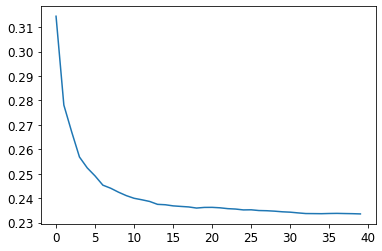

In [27]:
# Predictors
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])
r_mse(preds.mean(0), valid_y)
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(40)]);

In [28]:
# OOB prediction
r_mse(m.oob_prediction_, y)

0.210855

In [29]:
# Calculating feature importance
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
fi = rf_feat_importance(m, xs)

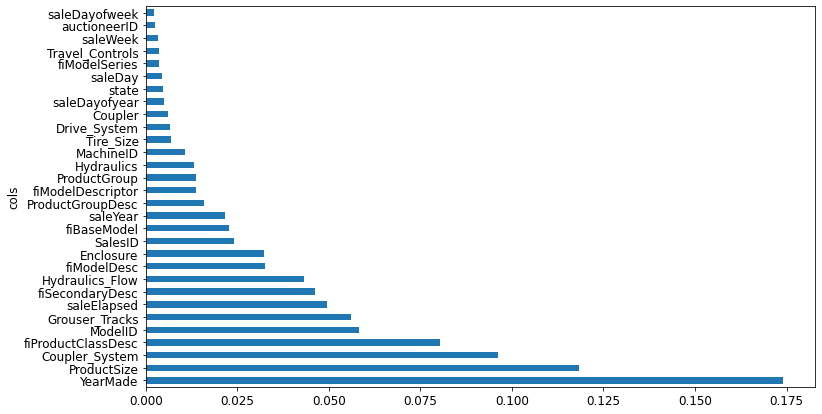

In [30]:
# Ploting Feature Importance
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

In [31]:
# Removing low importance columns
to_keep = fi[fi.imp>0.005].cols

In [32]:
# Retrain the model
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]
m = rf(xs_imp, y)

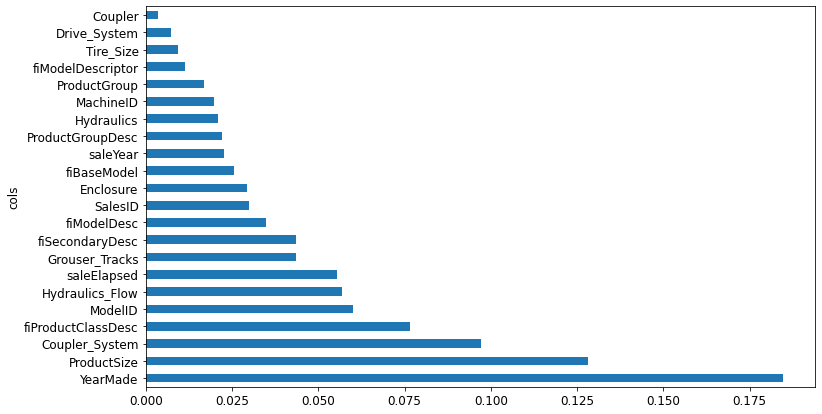

In [33]:
# Plot new feature importance chart
plot_fi(rf_feat_importance(m, xs_imp));

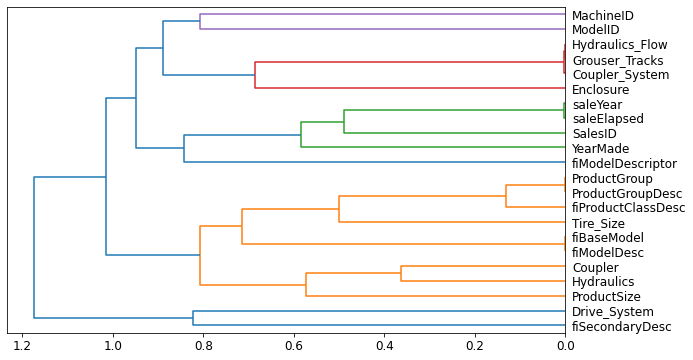

In [34]:
#Showing redundencies
cluster_columns(xs_imp)

In [35]:
# Remove redundencies
def get_oob(df):
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=15,
        max_samples=50000, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(df, y)
    return m.oob_score_

# Redundent Variables
{c:get_oob(xs_imp.drop(c, axis=1)) for c in (
    'saleYear', 'saleElapsed', 'ProductGroupDesc','ProductGroup',
    'fiModelDesc', 'fiBaseModel',
    'Hydraulics_Flow','Grouser_Tracks', 'Coupler_System')}

{'saleYear': 0.8761779438492778,
 'saleElapsed': 0.8721789203034216,
 'ProductGroupDesc': 0.8764747401345944,
 'ProductGroup': 0.8776934602244039,
 'fiModelDesc': 0.8750831651762974,
 'fiBaseModel': 0.8761966394666684,
 'Hydraulics_Flow': 0.8771904910404174,
 'Grouser_Tracks': 0.8771347243670824,
 'Coupler_System': 0.8770664083709313}

In [36]:
# Drop Closely aligned pairs
to_drop = ['saleYear', 'ProductGroupDesc', 'fiBaseModel', 'Grouser_Tracks']
get_oob(xs_imp.drop(to_drop, axis=1))

0.8757275635066423

In [37]:
# create DataFrames
xs_final = xs_imp.drop(to_drop, axis=1)
valid_xs_final = valid_xs_imp.drop(to_drop, axis=1)

# Save data
save_pickle(path/'xs_final.pkl', xs_final)
save_pickle(path/'valid_xs_final.pkl', valid_xs_final)

# Load data
xs_final = load_pickle(path/'xs_final.pkl')
valid_xs_final = load_pickle(path/'valid_xs_final.pkl')

In [38]:
# Check RMSE
m = rf(xs_final, y)
m_rmse(m, xs_final, y), m_rmse(m, valid_xs_final, valid_y)

(0.182312, 0.232127)

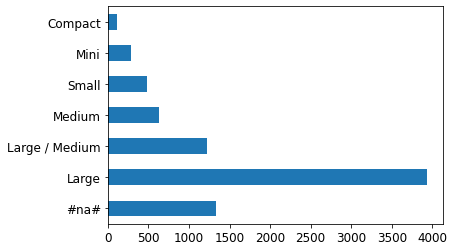

In [39]:
# Checking to see how common each category is
p = valid_xs_final['ProductSize'].value_counts(sort=False).plot.barh()
c = to.classes['ProductSize']
plt.yticks(range(len(c)), c);

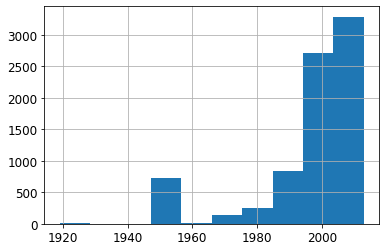

In [40]:
# Year made check
ax = valid_xs_final['YearMade'].hist()

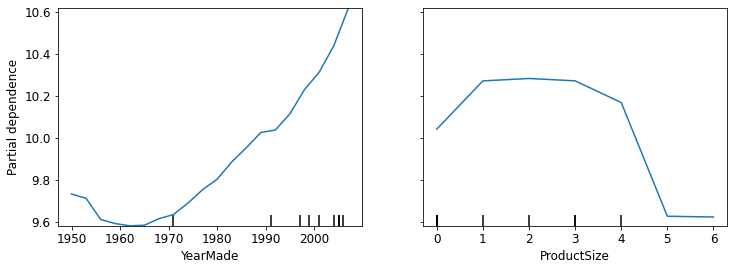

In [42]:
# partial dependence plot
from sklearn.inspection import PartialDependenceDisplay

fig,ax = plt.subplots(figsize=(12, 4))
PartialDependenceDisplay.from_estimator(m, valid_xs_final, ['YearMade','ProductSize'],
                        grid_resolution=20, ax=ax);

In [43]:
# Tree interpreter
import warnings
warnings.simplefilter('ignore', FutureWarning)

from treeinterpreter import treeinterpreter
from waterfall_chart import plot as waterfall

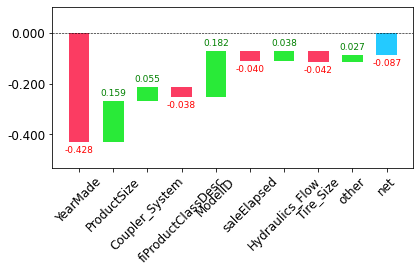

In [44]:
# Select a few rows from validation set and pass them to the interpreter
row = valid_xs_final.iloc[:5]
prediction,bias,contributions = treeinterpreter.predict(m, row.values)
prediction[0], bias[0], contributions[0].sum()

# Draw a waterfall chart of the independent variables
waterfall(valid_xs_final.columns, contributions[0], threshold=0.08, 
          rotation_value=45,formatting='{:,.3f}');

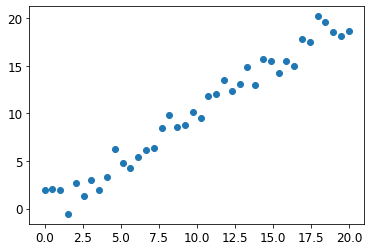

In [45]:
# Exploring Extrapolation Problem in Random Forests
np.random.seed(42)
x_lin = torch.linspace(0,20, steps=40)
y_lin = x_lin + torch.randn_like(x_lin)
plt.scatter(x_lin, y_lin);

In [48]:
# Convert from vector to matrix
xs_lin = x_lin.unsqueeze(1)
x_lin.shape,xs_lin.shape
x_lin[:,None].shape

torch.Size([40, 1])

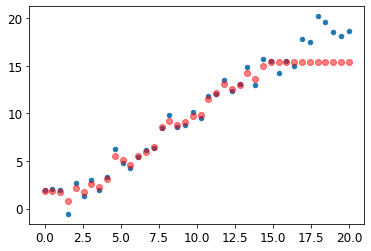

In [49]:
#create a random forest of the data and plot it
m_lin = RandomForestRegressor().fit(xs_lin[:30],y_lin[:30])
plt.scatter(x_lin, y_lin, 20)
plt.scatter(x_lin, m_lin.predict(xs_lin), color='red', alpha=0.5);

In [50]:
# Find feature importance in total data set
df_dom = pd.concat([xs_final, valid_xs_final])
is_valid = np.array([0]*len(xs_final) + [1]*len(valid_xs_final))

m = rf(df_dom, is_valid)

m = rf(xs_final, y)
print('orig', m_rmse(m, valid_xs_final, valid_y))

for c in ('SalesID','saleElapsed','MachineID'):
    m = rf(xs_final.drop(c,axis=1), y)
    print(c, m_rmse(m, valid_xs_final.drop(c,axis=1), valid_y))

orig 0.23177
SalesID 0.230962
saleElapsed 0.235751
MachineID 0.231223


In [51]:
# Removing SalesID and MachineID due to low importance
time_vars = ['SalesID','MachineID']
xs_final_time = xs_final.drop(time_vars, axis=1)
valid_xs_time = valid_xs_final.drop(time_vars, axis=1)

m = rf(xs_final_time, y)
m_rmse(m, valid_xs_time, valid_y)

0.229254

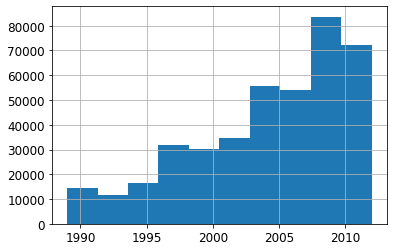

In [52]:
# Display salesyear graph
xs['saleYear'].hist();

In [53]:
# result of training this dataset
filt = xs['saleYear']>2004
xs_filt = xs_final_time[filt]
y_filt = y[filt]
m = rf(xs_filt, y_filt)
m_rmse(m, xs_filt, y_filt), m_rmse(m, valid_xs_time, valid_y)

(0.175833, 0.228619)

# Neural network solution

In [57]:
# Building a NN to solve the problem
df_nn = pd.read_csv(path/'TrainAndValid.csv', low_memory=False)
df_nn['ProductSize'] = df_nn['ProductSize'].astype('category')
df_nn['ProductSize'].cat.set_categories(sizes, ordered=True, inplace=True)
df_nn[dep_var] = np.log(df_nn[dep_var])
df_nn = add_datepart(df_nn, 'saledate')
df_nn_final = df_nn[list(xs_final_time.columns) + [dep_var]]
cont_nn,cat_nn = cont_cat_split(df_nn_final, max_card=9000, dep_var=dep_var)
cont_nn

['saleElapsed']

In [58]:
# Display the cardinality of each of the categorical variables
df_nn_final[cat_nn].nunique()

YearMade                73
ProductSize              6
Coupler_System           2
fiProductClassDesc      74
ModelID               5281
fiSecondaryDesc        177
Hydraulics_Flow          3
fiModelDesc           5059
Enclosure                6
fiModelDescriptor      140
ProductGroup             6
Hydraulics              12
Tire_Size               17
Drive_System             4
Coupler                  3
dtype: int64

In [59]:
# Removing unnessasary fiModelDescriptor category
xs_filt2 = xs_filt.drop('fiModelDescriptor', axis=1)
valid_xs_time2 = valid_xs_time.drop('fiModelDescriptor', axis=1)
m2 = rf(xs_filt2, y_filt)
m_rmse(m2, xs_filt2, y_filt), m_rmse(m2, valid_xs_time2, valid_y)
cat_nn.remove('fiModelDescriptor')

In [60]:
# adding the normalize processor and setting the batch size and y range
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn_final, procs_nn, cat_nn, cont_nn,
                      splits=splits, y_names=dep_var)

dls = to_nn.dataloaders(1024)

y = to_nn.train.y
y.min(),y.max()

(8.465899, 11.863583)

SuggestedLRs(valley=0.0003311311302240938)

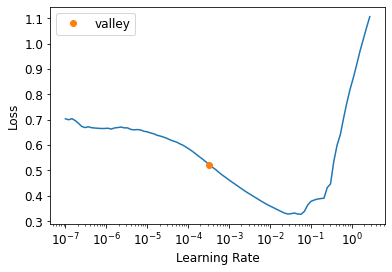

In [61]:
# Creating learner
learn = tabular_learner(dls, y_range=(8,12), layers=[500,250],
                        n_out=1, loss_func=F.mse_loss)

# Draw learner graph
learn.lr_find()

In [62]:
# Train the model for a few epochs
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,time
0,0.062675,0.065915,00:52
1,0.053057,0.054186,00:45
2,0.047545,0.059139,00:45
3,0.043332,0.050537,00:46
4,0.040218,0.050235,00:45


In [63]:
# Save the model
learn.save('nn')

Path('models/nn.pth')